## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on data science jobs posted on the website Glassdoor. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussion section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Data Science Job Salary Prediction
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Data of data science job posts from the website glassdoor are collected. This project aims to predict whether the salary is high or not. First, you will create a categorical variable `high_salary` based on the average salary `avg_salary`: if `avg_salary >= 150`, `high_salary = 1`; if `avg_salary < 150`, `high_salary = 0`. This new variable `high_salary` will be the prediction outcome. Of course: you cannot use other columns related to salary such as min, max, range of salary for prediction. (This is cheating!)  <br>

#### Variables:
Described in the data description file.

### Module 1: Data Exploration
Load `jobs_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 400 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR. <br>
You don't have to remove outliers if there are not any. Provide justifications if you deem not necessary.

In [1]:
import numpy as np
import pandas as pd

#import and parse data
data_train = pd.read_csv("jobs_train.csv").iloc[:,13:] # drop the columns which cannot be used to anaylize directly
data_test = pd.read_csv("jobs_test.csv").iloc[:,13:]

In [2]:
##check null value in both datasets
train_null = data_train[data_train.isnull().any(axis=1)].count() #not null value in the  train dataset
test_null = data_test[data_test.isnull().any(axis=1)].count() #not null value in the test data
print("train_null\n",train_null)  # there are no null values  in the training data
print("test_null\n",test_null) #there are no null values in the test data


train_null
 min_salary     0
max_salary     0
avg_salary     0
job_state      0
same_state     0
company_age    0
python         0
excel          0
hadoop         0
spark          0
aws            0
tableau        0
big_data       0
job_simp       0
seniority      0
dtype: int64
test_null
 min_salary     0
max_salary     0
avg_salary     0
job_state      0
same_state     0
company_age    0
python         0
excel          0
hadoop         0
spark          0
aws            0
tableau        0
big_data       0
job_simp       0
seniority      0
dtype: int64


In [3]:
## define check_illeage_value function to check illeage value 
def check_illeage_value(data):
    for x in data.columns:
        print(x,data[x].unique())
        
##define outlier function to check outliers only for quantitive columns (avg_salary ,company_age)
def outlier(column,data):
    Q1,Q3 = data[column].quantile(0.25),data[column].quantile(0.75)
    IQR = Q3-Q1
    threshold = ((data[column] <Q1-2.5*IQR)|(data[column]>Q3+2.5*IQR)|(data[column] < 0))
    return data[threshold].sort_values(by = column)

In [4]:
##check illeage values
print('data_train:')
print(check_illeage_value(data_train))
print('data_test:')
print(check_illeage_value(data_test))

data_train:
min_salary [105 124  91  69 137  92 128 145  31  79 212  90  66  95  71  56  87  99
 110  75 112 141  80 138 122 101]
max_salary [167 198 150 116 171 155 201 225  56 133 331 109 124 131 112 119 123  97
 141 132 163 147 158 106 146 165]
avg_salary [136 161 120  92 154 123 164 185  43 106 271  99 107 105  89  97  76 114
 115 113 103 183 148 134 133]
job_state [' WA' ' IA' ' NY' ' CA' ' MA' ' DC' ' OR' ' VA' ' OK' ' SC' ' IL' ' MD'
 ' FL' ' MO' ' TX' ' UT' ' CO' 'US' ' NC' ' IN' ' OH' ' GA' ' AZ' ' NJ'
 ' AL' ' CT' ' TN' ' NH' ' DE' ' PA' ' WI' ' NE' ' KS' ' RI' ' MN' ' MS'
 ' MI' ' WV' ' LA']
same_state [0 1]
company_age [ -1  28  57  38  39 109  12  50  73  25  22  34   8  44   7  55  24  23
  26  32   9  66   4  37   1  69   5 145 157  17   6  16  13  14  20  60
 140  21  65  62  10  33  48  18  53  46  78 107 232  72 170   3  15 171
 108  87  35  52 133  19  36   2  85 122  51  11  64  75  61  40  95  42
  54  27  81  71 102  30 167  31 124  43  74  47  49 190 169 112  83 

In [5]:
##In the traing data ,there are illeagle value, na in the seniority column
##so check the proportion of 'na' in seniority
seniority_na_rate = data_train[data_train['seniority']=='na'].shape[0]/data_train.shape[0]
seniority_na_rate  # because this value is totally high, this column should be removed from both training data and test data

0.8641509433962264

In [6]:
##In the traing data and test data ,there are illeagle value, na in the seniority column
##so check the proportion of 'na' in job_simp
train_jop_simp_na_rate = data_train[data_train['job_simp']=='na'].shape[0]/data_train.shape[0]
test_jop_simp_na_rate = data_test[data_test['job_simp']=='na'].shape[0]/data_test.shape[0]
(train_jop_simp_na_rate,test_jop_simp_na_rate)#the proportions are relatively little ,so remove these 'na' values from training data and test data 

(0.1018867924528302, 0.1076923076923077)

In [7]:
##check outilers in the training data and test data
train_outlier_avg_salary = outlier('avg_salary',data_train) 
test_outlier_avg_salary = outlier('avg_salary',data_test) 
print('train_outlier:')
print(train_outlier_avg_salary)#the outlier is 271, however it is resonable in the real world so not be removed 
print('test_outlier')
print(test_outlier_avg_salary)#there are no outliers in the test data

train_outlier:
     min_salary  max_salary  avg_salary job_state  same_state  company_age  \
12          212         331         271        NY           1           -1   
433         212         331         271        MA           0           -1   
429         212         331         271        MA           1            8   
421         212         331         271        TX           0           -1   
401         212         331         271        DC           0           -1   
395         212         331         271        DC           0           10   
392         212         331         271        MD           0           10   
384         212         331         271        US           0           18   
316         212         331         271        CA           0          124   
437         212         331         271        VA           0           -1   
289         212         331         271        DC           0            8   
238         212         331         271        OK

In [8]:
## operating the illeagel values

###drop na value in job_simp
data_train = data_train[data_train['job_simp'] != 'na']
data_test = data_test[data_test['job_simp'] != 'na']

###drop seniority column
data_train = data_train.drop('seniority',axis=1)
data_test = data_test.drop('seniority',axis = 1)

###opreating company_age column
data_train.loc[data_train['company_age'] < 0,'company_age'] = int(data_train.loc[data_train['company_age'] > 0,'company_age'].mean())
data_test.loc[data_test['company_age'] < 0,'company_age'] = int(data_test.loc[data_test['company_age'] > 0,'company_age'].mean())

In [9]:
##remove job state which is difficul to be used to annlyze 
data_train = data_train.drop('job_state',axis=1)
data_test = data_test.drop('job_state',axis=1)

##encoding categorial variables of training dataset
data_train['high_salary'] = (data_train['avg_salary']>=150).astype(int)
data_train_transform =pd.get_dummies(data_train,columns=['job_simp'],dtype=float)

##encoding categorial variables of test dataset
data_test['high_salary'] = (data_test['avg_salary']>=150).astype(int)
data_test_transform =pd.get_dummies(data_test,columns=['job_simp'],dtype=float)

##remove variables related to salary directly
data_train_transform = data_train_transform.drop(columns=['min_salary','max_salary','avg_salary'],axis = 1)
data_test_transform = data_test_transform.drop(columns=['min_salary','max_salary','avg_salary'],axis = 1)




### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the high-salary group versus the low-salary group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important. For variables with similar patterns, you may state in your findings that variables a, b, c have similar patterns.

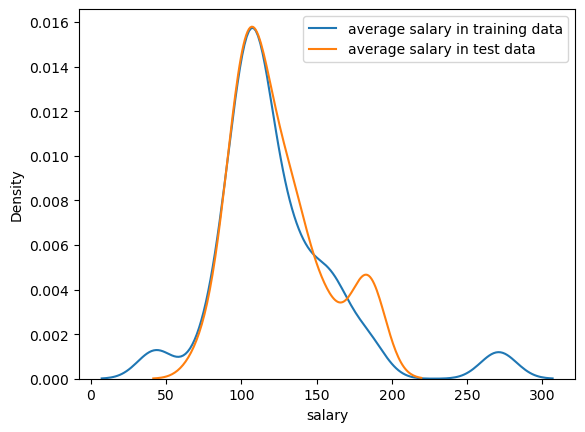

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#compare the distribution of avg_salary between training data and test data
sns.kdeplot(data_train['avg_salary'],label="average salary in training data")
sns.kdeplot(data_test['avg_salary'],label="average salary in test data")
plt.xlabel("salary")
plt.ylabel("Density")
plt.legend()

In [11]:
#explore the relationship between high salary and the kind of job
data_train_remove_na = data_train[data_train["job_simp"]!="na"].sort_values(by = 'job_simp')
data_train_remove_na.rename(columns = {'job_simp':'Type of job'},inplace = True)
data_test_remove_na = data_test[data_test["job_simp"]!="na"].sort_values(by = 'job_simp')
data_test_remove_na.rename(columns = {'job_simp':'Type of job'},inplace = True)

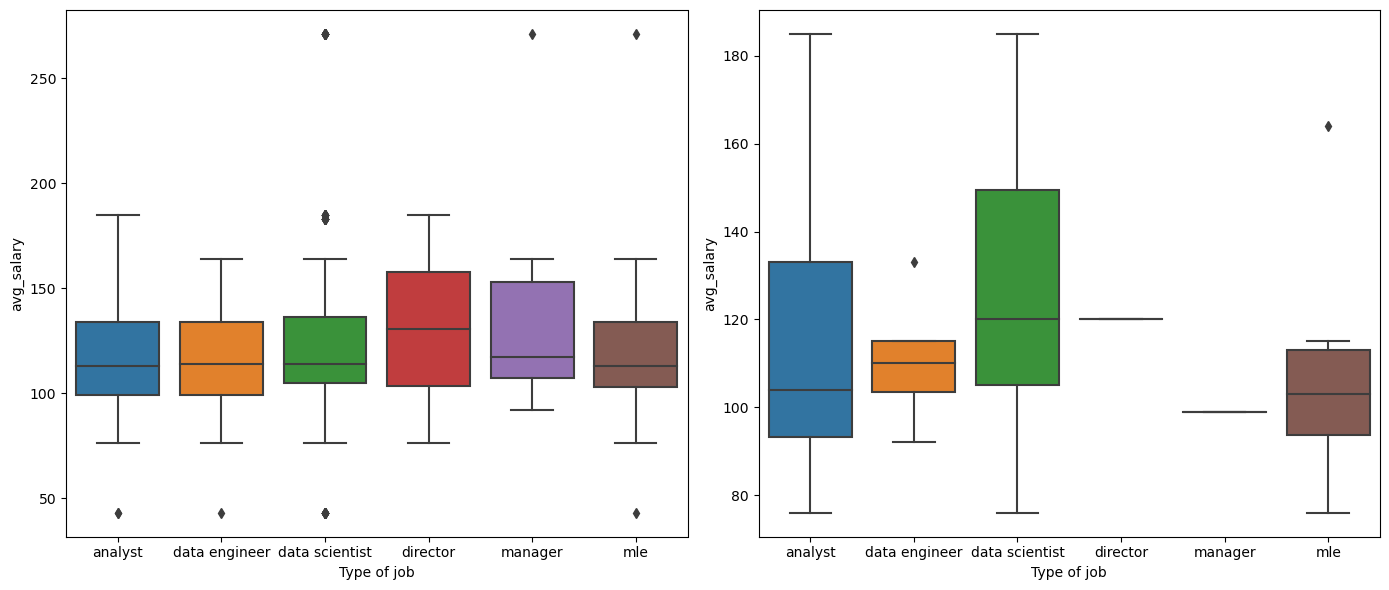

In [12]:
## draw box plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Type of job',y="avg_salary",data=data_train_remove_na,ax=axes[0])
sns.boxplot(x='Type of job',y="avg_salary",data=data_test_remove_na,ax=axes[1])


plt.tight_layout()
plt.show()

In [13]:
#explore the influence of categorial variables on the high salary 
categorial_variables = ['same_state','python', 'excel', 'hadoop', 'spark', 'aws', 'tableau','big_data']
def summary_variables(data):
    low,high= [],[]
    for x in categorial_variables:
        data_target = data[data[x]==1][x]
        low_salary = data[data['high_salary']==0].shape[0]
        high_salary = data.shape[0] - low_salary
        low_salary_yes = data_target[data['high_salary']==0].shape[0]
        high_salary_yes = data_target[data['high_salary']==1].shape[0]
        low_rate = low_salary_yes/low_salary
        high_rate = high_salary_yes/high_salary
        low.append(low_rate)
        high.append(high_rate)
    summary_variables = pd.DataFrame({"categorial_variables":categorial_variables,"low_salary":low,"high_salary":high})
    return summary_variables

train_summary_variables = summary_variables(data_train)
test_summary_variables = summary_variables(data_test)
        

Text(0.5, 1.0, 'training data vs test data')

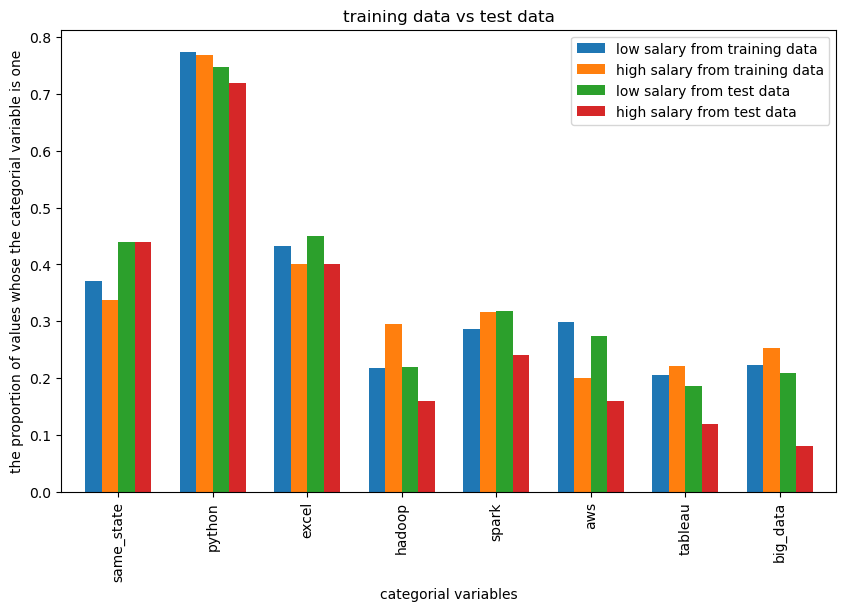

In [14]:
summary_variables = pd.merge(train_summary_variables,test_summary_variables,on="categorial_variables")
summary_variables.set_index('categorial_variables',inplace=True)
summary_variables.rename(columns={"low_salary_x":"low salary from training data",
                                  "high_salary_x":"high salary from training data",
                                  "low_salary_y":"low salary from test data",
                                  "high_salary_y":"high salary from test data"},inplace =True)
ax = summary_variables.plot(kind='bar', width=0.7, figsize=(10, 6))
plt.xlabel('categorial variables')
plt.ylabel('the proportion of values whose the categorial variable is one')
plt.title("training data vs test data")


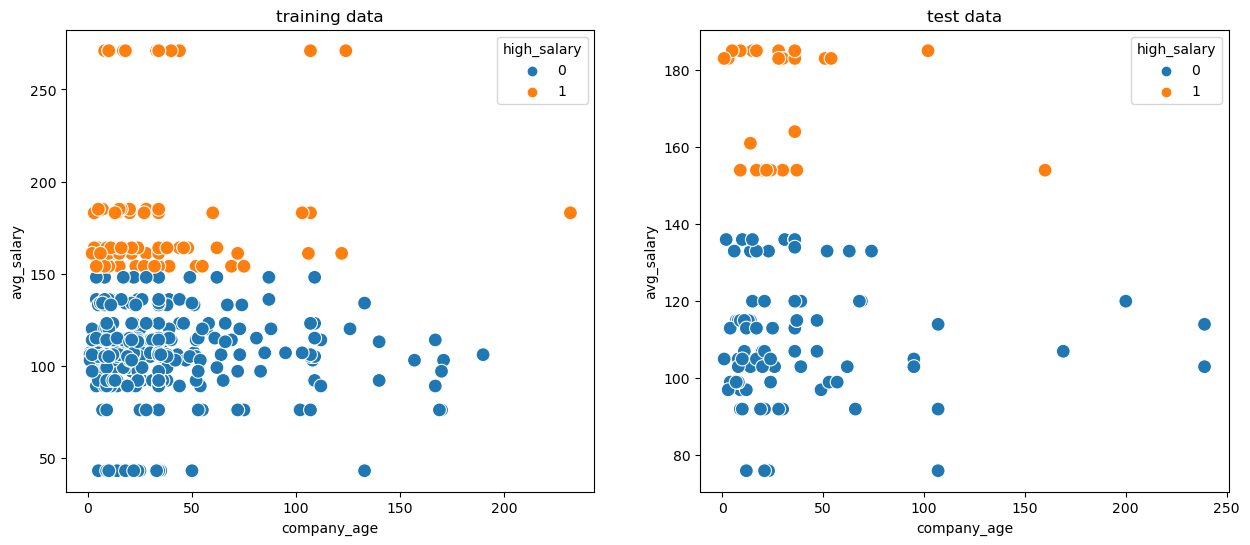

<Figure size 1000x600 with 0 Axes>

In [15]:
#cacs
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x='company_age', y='avg_salary', hue='high_salary', data=data_train, s=100,ax=axes[0])
axes[0].set_title('training data')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_age', y='avg_salary', hue='high_salary', data=data_test, s=100,ax=axes[1])
axes[1].set_title('test data')

plt.show()



### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib.pyplot import subplots

#transfrom training data
X_train = data_train_transform.drop('high_salary',axis = 1)
y_train = data_train_transform['high_salary']
X_test = data_test_transform.drop('high_salary',axis = 1)
y_test = data_test_transform['high_salary']

#standerization
scaler = StandardScaler(with_std=True, with_mean=True)
X_train_transform_scaled = scaler.fit_transform(X_train)

#fit PCA model
pca = PCA()
pca.fit(X_train_transform_scaled)

# apply PCA to standardized data to obtain PC scores
scores = pca.transform(X_train_transform_scaled)


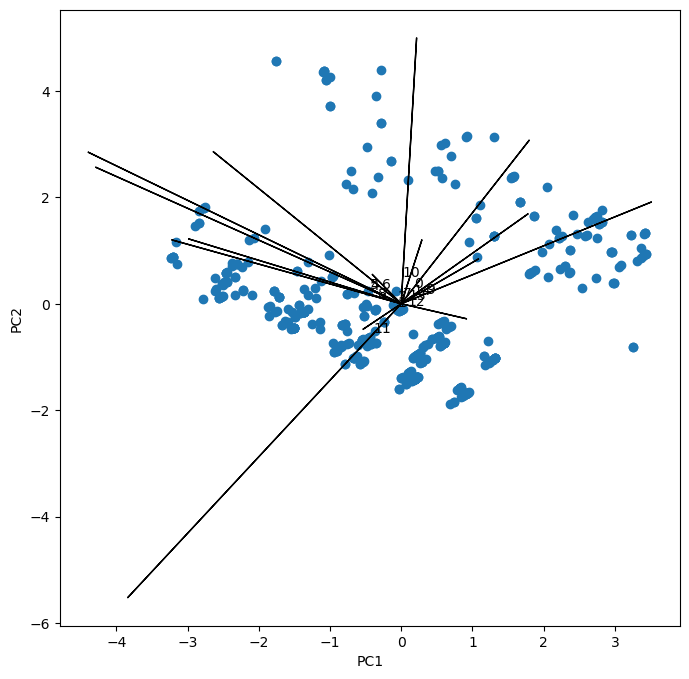

In [17]:
i, j = 0, 1 
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]): 
    ax.arrow(0, 0, 10*pca.components_[i,k], 10*pca.components_[j,k])
    ax.text(pca.components_[i,k], pca.components_[j,k], k)

In [18]:
#expolre the relationship bewteen explained variance ratio and the number of variables
pca.explained_variance_ratio_

array([1.53885052e-01, 1.24047713e-01, 1.01735512e-01, 7.33611871e-02,
       7.18384393e-02, 6.89175060e-02, 6.73951302e-02, 6.24909819e-02,
       5.78728340e-02, 5.56852429e-02, 5.15203672e-02, 4.50261993e-02,
       3.75956251e-02, 2.86282098e-02, 2.09951044e-32])

In [19]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1 
ax = axes[0]  
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

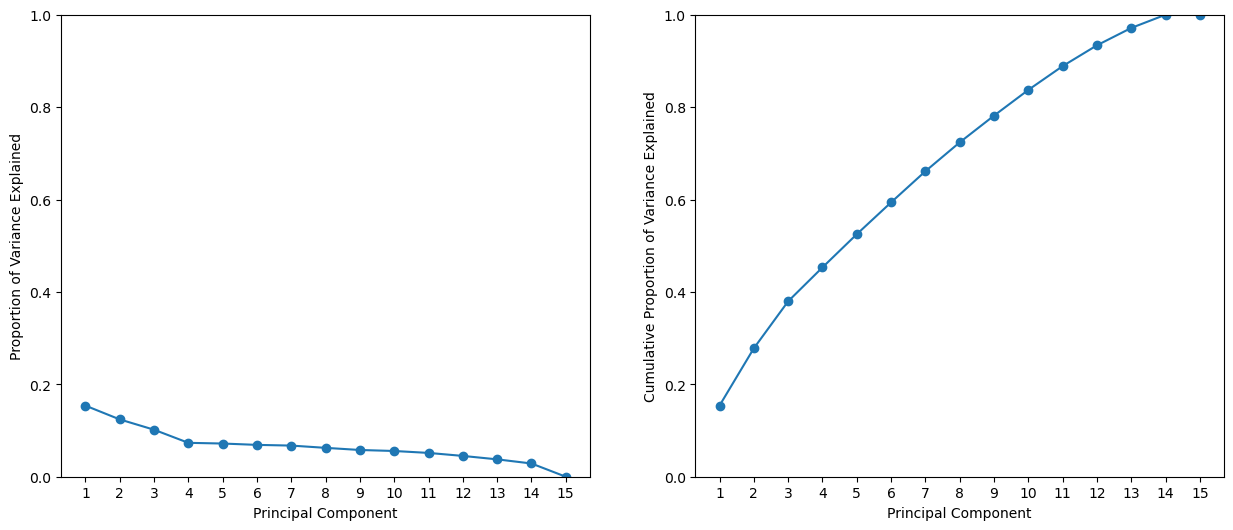

In [20]:
ax = axes[1]  # the second subplot
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

### Module 4: Regression and Prediction
Choose three regression methods and build regression models based on data from `jobs_train.csv`, using five-fold cross-validation. <br>

Further, load `jobs_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the mean squared error. Which observations have the worst prediction and what are their characteristics? <br>

Note: we don't deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.  

In [21]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import (cross_val_score,GridSearchCV)
from sklearn.svm import SVC
from sklearn.tree import (DecisionTreeClassifier as DTC,
                        plot_tree, export_text)

In [22]:
# Define random forest models with different hyperparameters
rf1 = RandomForestClassifier(n_estimators = 2,random_state = 0)
rf2 = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf3 = RandomForestClassifier(n_estimators = 100,random_state = 0)
rf4 = RandomForestClassifier(n_estimators = 500,random_state = 0)

In [23]:
##Perform 5-fold CV on the training data 
rf1_cv_acc = cross_val_score(rf1,X_train,y_train,cv=5,scoring = 'accuracy')
rf2_cv_acc = cross_val_score(rf2,X_train,y_train,cv=5,scoring = 'accuracy')
rf3_cv_acc = cross_val_score(rf3,X_train,y_train,cv=5,scoring = 'accuracy')
rf4_cv_acc = cross_val_score(rf4,X_train,y_train,cv=5,scoring = 'accuracy')

##Print performance metrics
print(f'Average 5-fold cross-validation accuracy for rf1 (n_estimators = 2): {rf1_cv_acc.mean()}')
print(f'Average 5-fold cross-validation accuracy for rf2 (n_estimators = 10): {rf2_cv_acc.mean()}')
print(f'Average 5-fold cross-validation accuracy for rf3 (n_estimators = 100): {rf3_cv_acc.mean()}')
print(f'Average 5-fold cross-validation accuracy for rf4 (n_estimators = 500): {rf4_cv_acc.mean()}')


Average 5-fold cross-validation accuracy for rf1 (n_estimators = 2): 0.7563157894736843
Average 5-fold cross-validation accuracy for rf2 (n_estimators = 10): 0.7478947368421054
Average 5-fold cross-validation accuracy for rf3 (n_estimators = 100): 0.7542105263157894
Average 5-fold cross-validation accuracy for rf4 (n_estimators = 500): 0.7583991228070176


In [24]:
#explore whether SVM whose kernel is linear is better than random forest
param_grid = {'C':[0.01,0.1,1,5,10]}
svm_model = svm_model = SVC(kernel="linear")
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.01}

In [25]:
#explore whether SVM whose kernel is radial  is better than random forest
param_grid = {'C':[0.01,0.1,1,5,10]}
svm_model = svm_model = SVC(kernel="rbf")
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.01}

In [26]:
#explore whether decision classfiation tree  is better than random forest
param_grid = {'max_depth':[2,3,4,5,6,7,8]}
clf_model = DTC(criterion='entropy', random_state=0)
grid = GridSearchCV(estimator=clf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 2}

In [27]:
## Fit the best random forest model to the entire training set
rf_final_model = RandomForestClassifier(n_estimators=500, random_state=0)
rf_final_model.fit(X_train, y_train)

# Make predictions on the training and testing data
train_preds = rf_final_model.predict(X_train)
test_preds = rf_final_model.predict(X_test)

# Calculate the accuracy for each
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Print results
print(f'The final model training set accuracy is {train_accuracy}')
print(f'The final model testing set accuracy is {test_accuracy}')

The final model training set accuracy is 0.9117647058823529
The final model testing set accuracy is 0.75


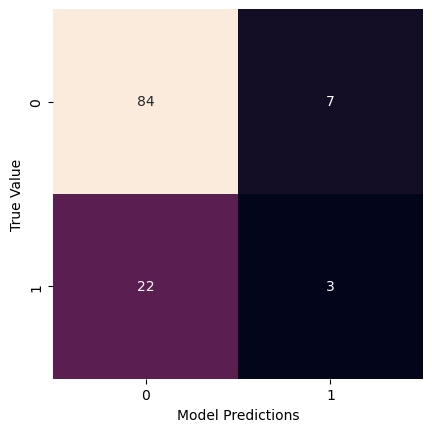

In [28]:
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

In [29]:
# Fit the second best random forest model to the entire training set
rf_final_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_final_model.fit(X_train, y_train)

## Make predictions on the training and testing data
train_preds = rf_final_model.predict(X_train)
test_preds = rf_final_model.predict(X_test)

## Calculate the accuracy for each
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

## Print results
print(f'The final model training set accuracy is {train_accuracy}')
print(f'The final model testing set accuracy is {test_accuracy}')

The final model training set accuracy is 0.9117647058823529
The final model testing set accuracy is 0.7327586206896551


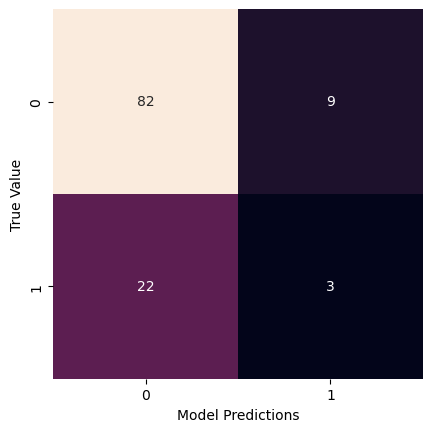

In [30]:
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

In [31]:
# Fit the third best random forest models to the entire training set
rf_final_model = RandomForestClassifier(n_estimators=2, random_state=0)
rf_final_model.fit(X_train, y_train)

## Make predictions on the training and testing data
train_preds = rf_final_model.predict(X_train)
test_preds = rf_final_model.predict(X_test)

## Calculate the accuracy for each
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

## Print results
print(f'The final model training set accuracy is {train_accuracy}')
print(f'The final model testing set accuracy is {test_accuracy}')

The final model training set accuracy is 0.8445378151260504
The final model testing set accuracy is 0.7586206896551724


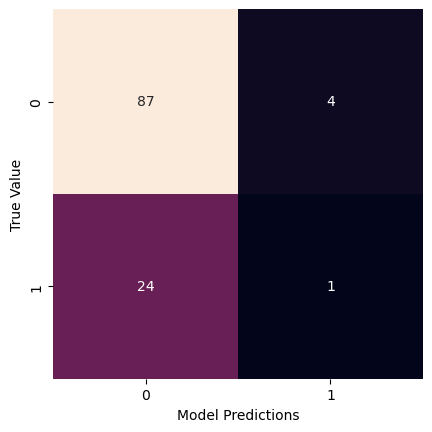

In [32]:
#draw confusion table
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

In [33]:
# Fit best linear svm model to the entire training set
svm_final_model =  SVC(kernel='linear',C = 0.01)
svm_final_model.fit(X_train, y_train)

## Make predictions on the training and testing data
train_preds = svm_final_model.predict(X_train)
test_preds = svm_final_model.predict(X_test)

## Calculate the accuracy for each
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

## Print results
print(f'The final model training set accuracy is {train_accuracy}')
print(f'The final model testing set accuracy is {test_accuracy}')

The final model training set accuracy is 0.8004201680672269
The final model testing set accuracy is 0.7844827586206896


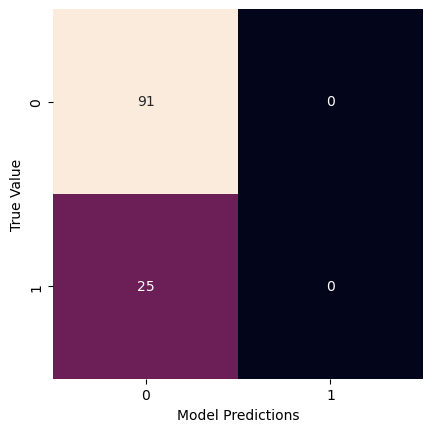

In [34]:
#draw confusion table
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

In [35]:
# Fit best radial svm  to the entire training set
svm_final_model =  SVC(kernel='rbf',C = 0.01)
svm_final_model.fit(X_train, y_train)

## Make predictions on the training and testing data
train_preds = svm_final_model.predict(X_train)
test_preds = svm_final_model.predict(X_test)

## Calculate the accuracy for each
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

## Print results
print(f'The final model training set accuracy is {train_accuracy}')
print(f'The final model testing set accuracy is {test_accuracy}')

The final model training set accuracy is 0.8004201680672269
The final model testing set accuracy is 0.7844827586206896


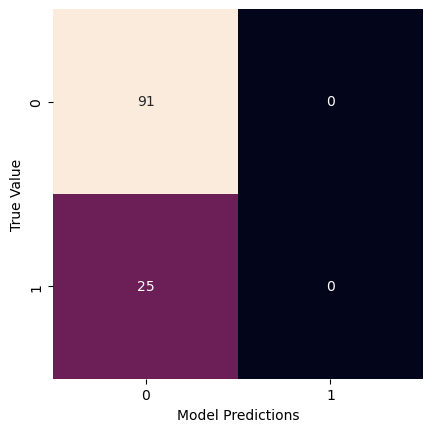

In [36]:
#draw confusion table
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

In [37]:

# Fit best classfication tree to the entire training set
clf_final_model =  DTC(criterion='entropy', max_depth=2, random_state=0).fit(X_train, y_train)

## Make predictions on the training and testing data
train_preds = clf_final_model.predict(X_train)
test_preds = clf_final_model.predict(X_test)

## Calculate the accuracy for each
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

## Print results
print(f'The final model training set accuracy is {train_accuracy}')
print(f'The final model testing set accuracy is {test_accuracy}')

The final model training set accuracy is 0.8004201680672269
The final model testing set accuracy is 0.7844827586206896


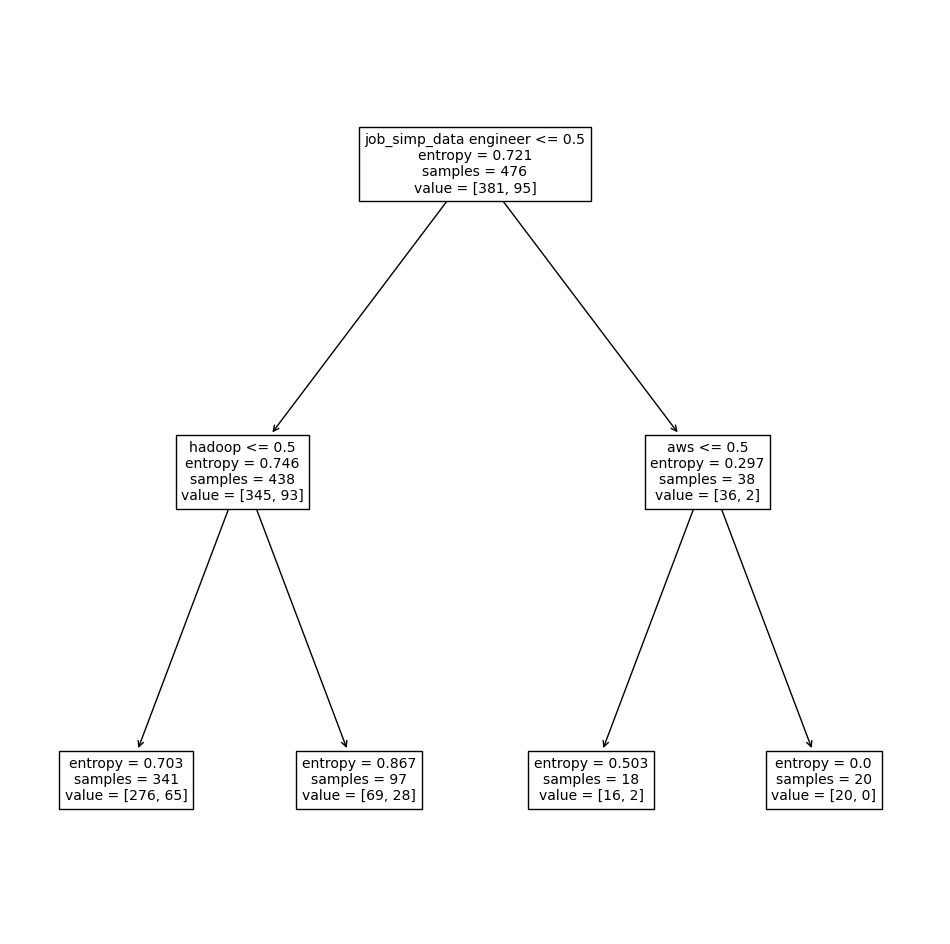

In [38]:
# plot the tree
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(clf_final_model, feature_names=list(X_train.columns), ax=ax);

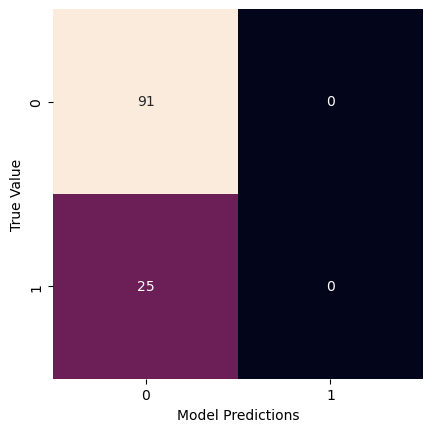

In [39]:
#draw confusion table
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value');

### Module 5: Summary
Summarize your findings and draw conclusions. Are there any interesting patterns that you would like to highlight?

1．Data exploration 
After importing the training dataset and  test dataset, the columns which contains text and cannot be used to analyze directly and ‘Rating’ column which has nothing to do with salary are removed. There are no null values in both datasets , but the illegal values are found in the company age column and seniority column. As for the company age ,the outliers are also found but  reasonable so not to be removed, so the illegal values can be replaced by the mean value of remain all data in company age. Since the proportion of ‘na’ ,the illegal value in seniority column is above 80%, we don’t use this column for data visualization and prediction. Finally ,jop_simp column is transfer to several categorial variables and the categorial variable ,high_salary is added into both datasets depending on avg_salary.

2.Data Visualization
2.1 the distribution of avg_salary from training data and test dataset
According to the figure ,we can find that  the two distribution is similar and nearly symmetrical, the ascending branch of which are even coincident and the descending branch of which are slightly different especially when the avg_salary is greater than 150. No matter in training data or test data ,the probabilities of high_salary  are obviously smaller than 0.5,which means the distribution of data between high salary  and low salary are not symmetric. So, we cannot only concern the accuracy of prediction when measuring models.

2.2 explore the relationship between high salary and the kind of job.
For the training data, there are no significant differences in the medians of the various positions, except that the average salary of director is slightly higher than that of the other groups. So, the job_simp may have little influence on average salary. Besides, the box plot of test data is different from the training data’s especially for the width of analyst and data scientist. Additionally , there are few managers and directors in the test dataset.

2.3 visualize categorial variables (same state, python, excel, Hadoop, spark, aws, tableau, big data) 
For each category variable, if the share of certainty in the high wage group is significantly different from that in the low wage group, the variable is likely to influence high wage. If this rate in training data is higher than that in  test data, the categorial variable has positive influence on the high variable, otherwise ,it may have negative influence. However ,it is impossible that commanding skills such as python ,excel causes low salary logically. For same state, hadoop, spark, tableau, big data, the training data and test data shows opposite results.

2.4 heck whether company age has influence on average salary.
According to the scatter plots ,most observations gather in the area whose company age is less than 100. Besides ,there are no obvious relationship between average salary and company age ,which means company age may have nothing to do with average salary.

3.Dimension reduction
Using the explained variance ratio to measure the principal comment components ,the ratio is higher than 0.8 when the number of principal components is higher than 11, which means no one variable is more important than the others conspicuously. The reason may be that the job_simp variable is transfer to 5 categorical variables which should have the same influence on high salary. Overall ,the outcome of PCA is not favorable.

4.Regression and Prediction
Only using accuracy to measure models is not reasonable for unsymmetric data, because the accuracy can be high even predict all observations to 0.So for every model ,the accuracy and sensitivity should be calculated to compare. 
Firstly，I use 4 random forest models and select the best three models according to cross validation. The n_estimators of three models selected are 500,100,2 respectively. Then ,I use best SVM with linear kernel, best SVM with radial kernel, and classification tree to see whether there is improvement.

RandomForestClassifier with n_estimators =500 
Test data:
Accuracy = 0.75                         sensitivity = 0.12
Training data : Accuracy = 0.9117647058823529

RandomForestClassifier with n_estimators =100 
Test data:
Accuracy = 0.7327586206896551                               sensitivity = 0.12
Training data : Accuracy = 0.9117647058823529

RandomForestClassifier with n_estimators =2
Test data:
Accuracy 0.7586206896551724                                 sensitivity = 0.04
Training data : Accuracy = 0.8445378151260504

Linear SVM  with C = 0.01
Test data:
Accuracy = 0.7844827586206896                               sensitivity =  0
Training data = Accuracy = 0.8004201680672269

Radial  SVM  with C = 0.01, the result is the same as Linear SVM.

Classification tree with max_depth =2 ，the result is the same as Linear SVM and Radial SVM.

For the SVM and classification tree ,although accuracy is close to 0.80,the sensitivity is 0 which means these models predict all the observations to 0. So these models are useless and fail to predict. Considering accuracy and sensitivity, the random forest model with 500 trees performs best ,but there may be overfitting problem because the training data accuracy is higher than 0.9.Additionnaly ,the reason why the best model still performs worse relatively  is that there are only 450 observations to train models which maybe not enough. If I can get more data from the resource website ,maybe the performance can be improved. However , the model selection may output different result.